# Purpose
To illustrate mutations that differentiate between BA.1 and BA.2.
Based on an alignment of 10 sequences each, mutations that differentiate between BA.1 and BA.2 are listed. In addition to this, 4 mutations only appear to be present in true BA.3. Note that the mutations can be changed, e.g. BA.2 also occurs with S: 69-70 deletion which in the list below are classified as mutations as typical of BA.1.

NOTE that the sequences in the input file must be aligned with Wuhan-Hu-1, use for example through nextalign or nextclade.

The script requires pandas and BioPython.

### Mixed infections
A position is counted as mixed base if it is a "correct" mix of the base for BA.1 and BA.2 on the position, if the two variants have C and T respectively on the position, Y is counted as base for mixed infection.

In [1]:
import pandas as pd
from Bio import SeqIO 
from Bio.SeqRecord import SeqRecord
from matplotlib import pyplot as plt

In [2]:
# list of nucletide positions differentiating BA.1 from BA.2 and positions with specific mutations for BA.3

list_pos = [670,832,2790,2832,4184,4321,5386,6513,6514,6515,8393,9344,9424,9534,9866,10198,10447,11235,11285,11286,11287,11537,12880,13195,15240,15714,17410,19955,20055,21618,21762,21765,21766,21767,21768,21769,21770,21846,21987,21988,21989,21990,21991,21992,21993,21994,21995,22194,22195,22196,22200,22673,22688,22775,22786,22792,22898,23048,23202,24130,24503,25000,25584,26060,26858,27382,27383,27384,29510,29734,29735,29736,29737,29738,29739,29740,29741,29742,29743,29744,29745,29746,29747,29748,29749,29750,29751,29752,29753,29754,29755,29756,29757,29758,29759]
list_BA1 = ["T","0","C","G","G","C","G","-","-","-","A","C","A","C","C","C","G","0","-","-","-","G","C","C","T","C","C","C","A","C","T","-","-","-","-","-","-","T","-","-","-","-","-","-","-","-","-","-","-","-","T","C","A","G","A","C","A","A","A","A","T","0","0","C","C","G","A","T","A","G","A","G","G","C","C","A","C","G","C","G","G","A","G","T","A","C","G","A","T","C","G","A","G","T","G"]
list_BA2 = ["G","0","T","A","A","T","T","G","T","T","G","T","G","T","T","T","A","0","T","T","G","A","T","T","C","T","T","T","G","T","C","T","A","C","A","T","G","C","A","T","G","T","T","T","A","T","T","A","T","T","G","T","G","A","C","T","G","G","C","C","C","0","0","T","T","C","T","C","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"]
list_ambi =["K","0","Y","R","R","Y","K","0","0","0","R","Y","R","Y","Y","Y","R","0","0","0","0","R","Y","Y","Y","Y","Y","Y","R","Y","Y","0","0","0","0","0","0","Y","0","0","0","0","0","0","0","0","0","0","0","0","K","Y","R","R","M","Y","R","R","M","M","Y","0","0","Y","Y","S","W","Y","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0"]
list_BA3 = ["0","T","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","T","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","C","C","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0"]


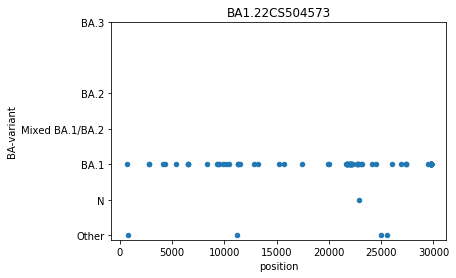

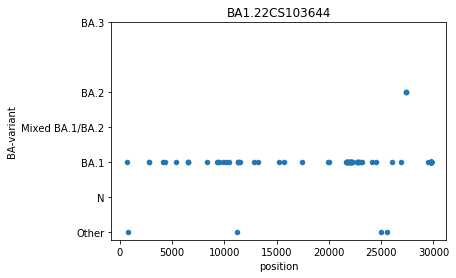

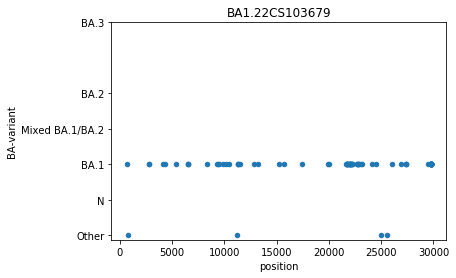

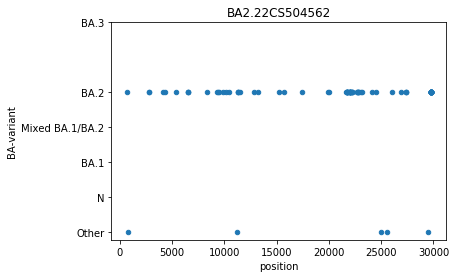

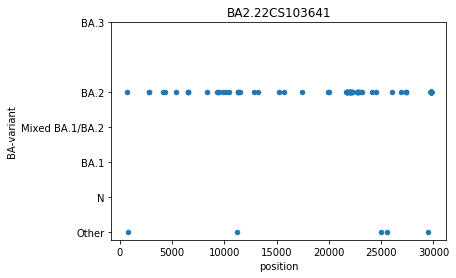

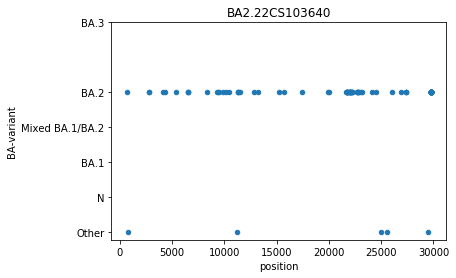

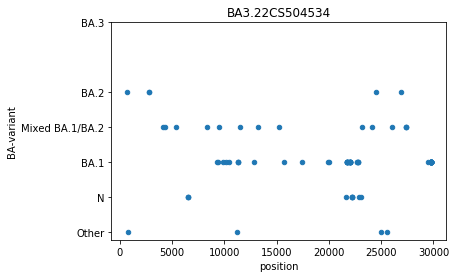

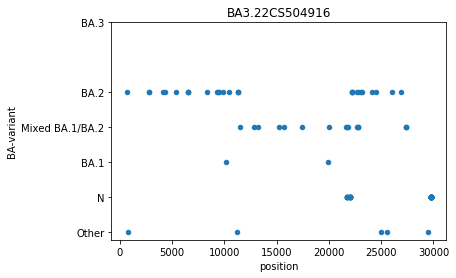

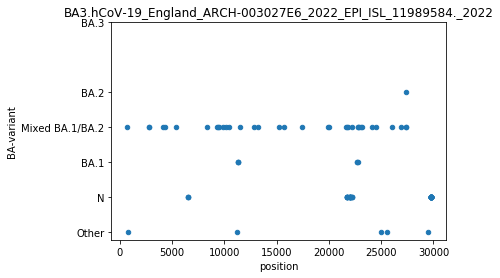

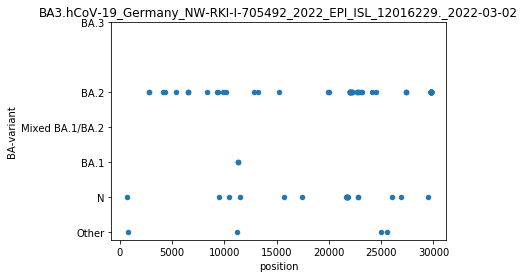

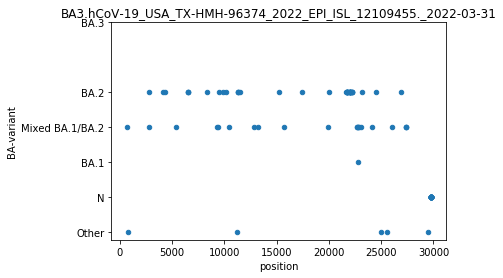

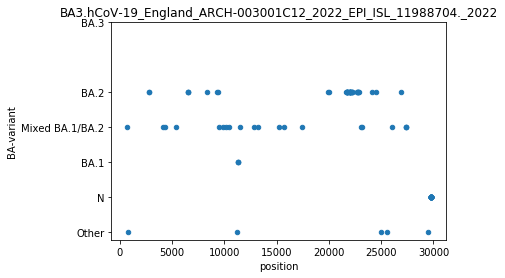

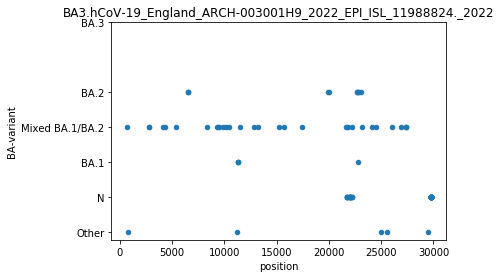

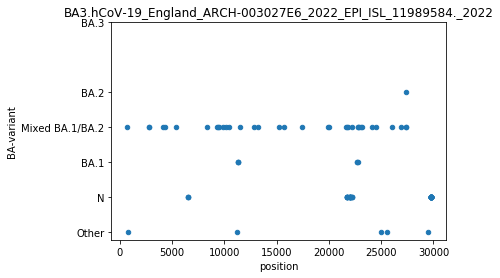

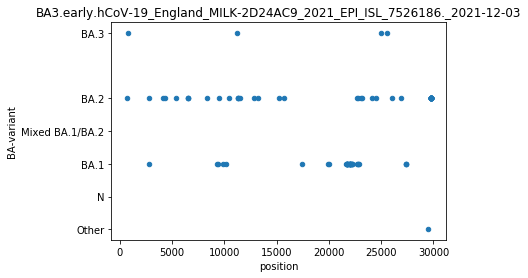

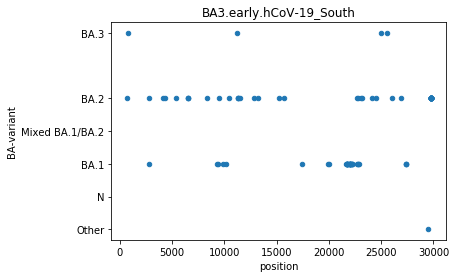

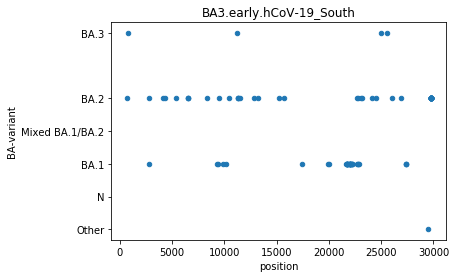

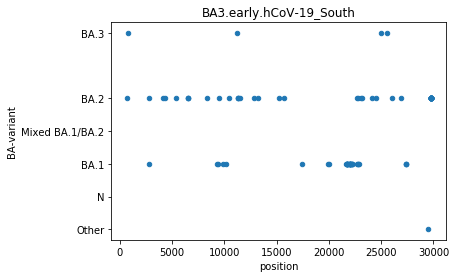

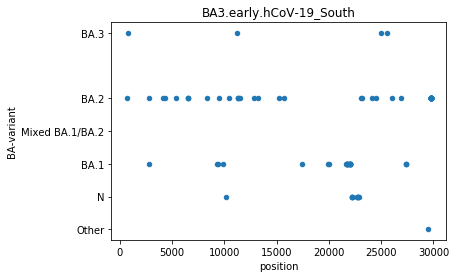

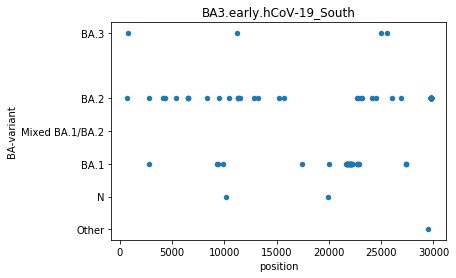

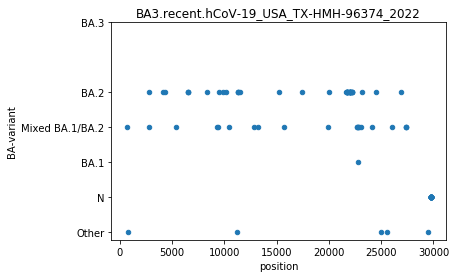

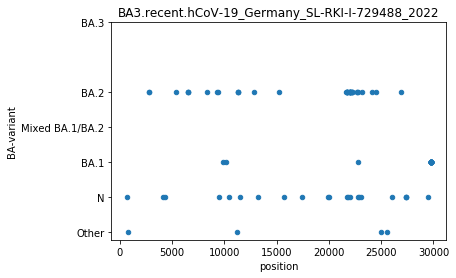

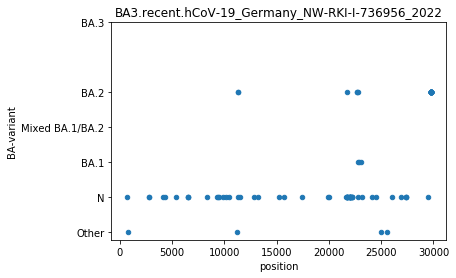

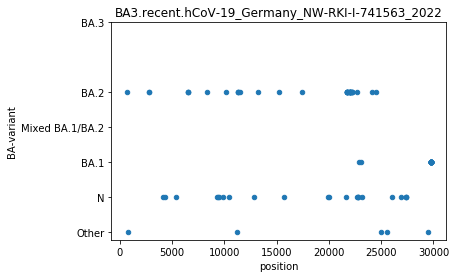

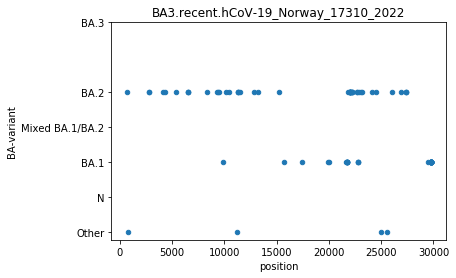

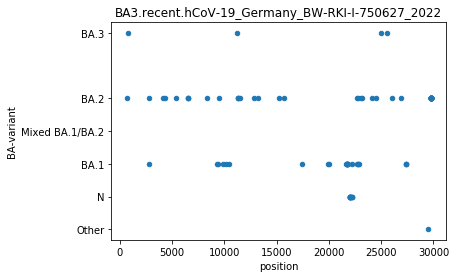

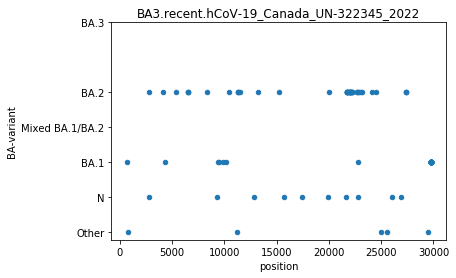

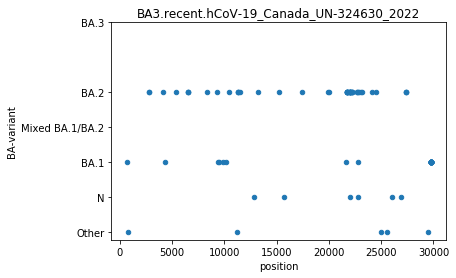

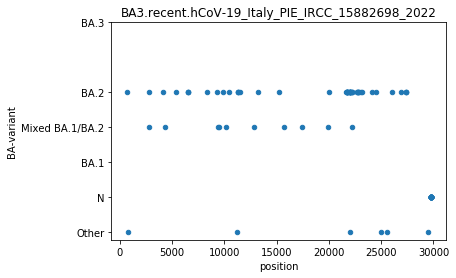

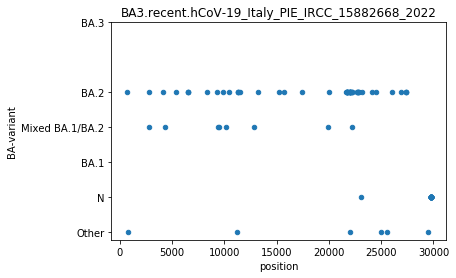

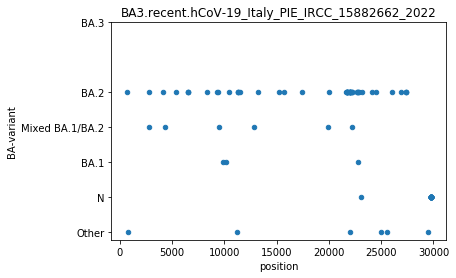

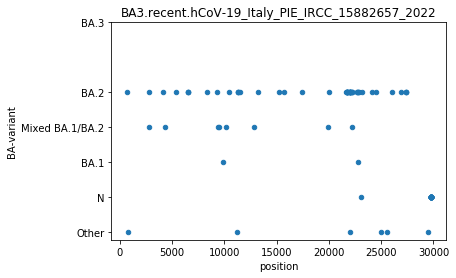

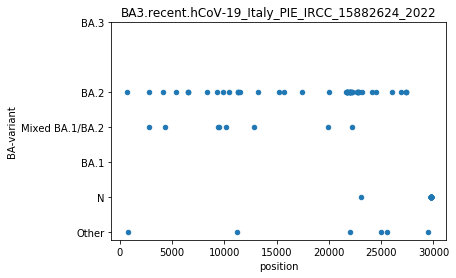

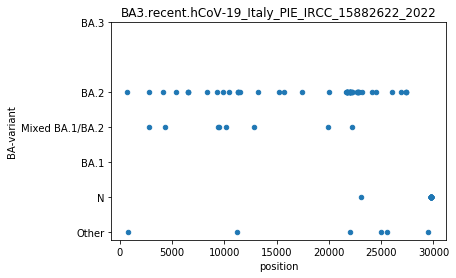

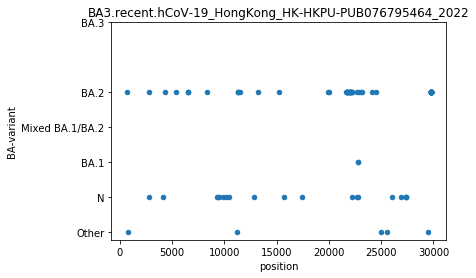

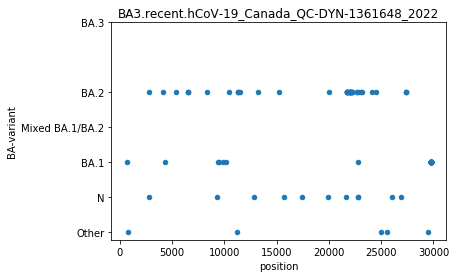

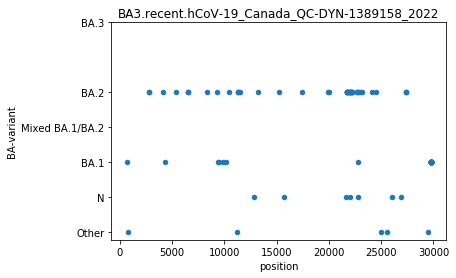

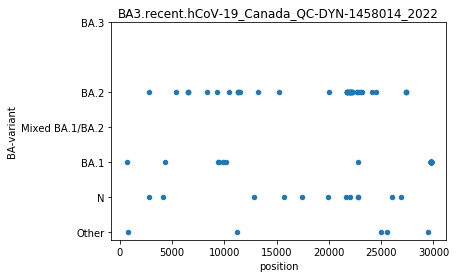

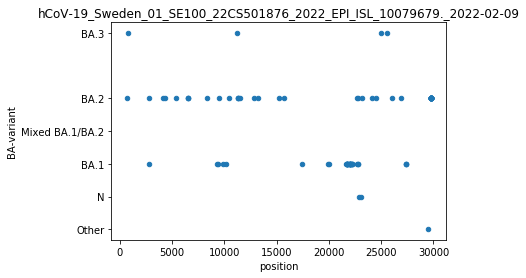

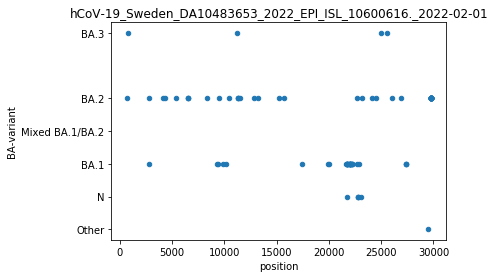

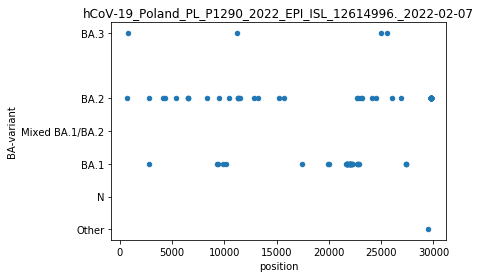

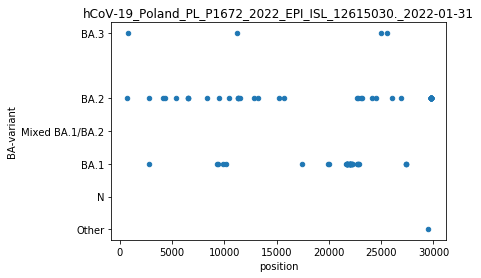

In [5]:
with open("query.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):    
        seq = record.seq
        fasta_header = record.id
        result = []
        nucl = []
        i = 0
        try:
            while i <91:    
                pos = list_pos[i]-1
                nucl.append(seq[pos])
                if seq[pos] == list_BA1[i]:
                    result.append(1) 
                    i = i + 1
                elif seq [pos] == list_BA2[i]:
                    result.append(2)
                    i = i + 1 
                elif seq [pos] == list_ambi[i]:
                    result.append(1.5)
                    i = i + 1 
                elif seq [pos] == list_BA3[i]:
                    result.append(3)
                    i = i + 1 
                elif seq [pos] == 'N':
                    result.append(.5)
                    i = i + 1 
                else:
                    result.append(0)
                    i = i + 1
        except:
            print("Error: ", fasta_header)
        df_position = pd.DataFrame(list_pos)
        df_nucl = pd.DataFrame(nucl)
        df_result = pd.DataFrame(result)
        df_summary = pd.concat([df_position,df_result,df_nucl],axis=1)
        df_summary.columns = ['position','BA-variant','nucleotide']
        export = df_summary.T
        ax = df_summary.plot(x ='position', y='BA-variant', kind = 'scatter',yticks=[0,.5,1,1.5,2,3],title=fasta_header)
        ax.set_yticklabels(['Other','N','BA.1','Mixed BA.1/BA.2','BA.2','BA.3'])
        export.to_csv(fasta_header+'.csv',index=False)
        plt.savefig(fasta_header+'.png', format='png')
        plt.show()
        plt.close()